# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

The goal is to identify students who might need early intervention before they fail to graduate. This can be achieved to predict the 'passed' feature, this is a categorical variable with 2 possible values (yes/no). Since the type of supervised learning problem depends on the type of the predicted output, it is a classification problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [138]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data and print summary
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
student_data.describe(include = 'all')

Student data read successfully!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,NaN,NaN,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,NaN
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,NaN,NaN,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,NaN


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [139]:
from __future__ import division

# Calculate number of students
n_students = len(student_data.index)

# Calculate number of features (last column of the data is the label, so this one should not be counted)
n_features = len(student_data.columns[:-1])

# Calculate passing students
n_passed = len(student_data[student_data.passed == 'yes'])

# Calculate failing students
n_failed = len(student_data[student_data.passed == 'no'])

# Calculate graduation rate and balance rate
grad_rate = (n_passed / n_students) * 100
balance_rate = (n_passed / n_failed) * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)
print "Balance rate: {:.2f}%".format(balance_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%
Balance rate: 203.85%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [140]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [141]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [142]:
# Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

#Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Dataset properties**
- not much training data (300 students)
- in absolute sense not many features (30)
- the labels are unbalanced but not too bad (more than 2 many student passed than failed)

**DecisionTreeClassifier** 
- DecisionTreeClassifiers are used in nursing to help making predictions (see https://www.nursingtimes.net/roles/nurse-managers/using-decision-trees-to-aid-decision-making-in-nursing/204292.article) 
- Advantages of this model is that the model is human readable and it is fast in making predictions (once the model is build). 
- Disadvantages are that the model building phase can be slow and it can quickly overfit to the training data.

I have chosen DecisionTreeClassifier because
- it can be used for binary classification problems
- once the model is trained, predictions are fast 
- it is human readable

**Support Vector Machines (SVM)** 
- SVM's are used in document classification systems (https://www.quantstart.com/articles/Supervised-Learning-for-Document-Classification-with-Scikit-Learn) 
- SVM's work well in high dimensionality space (many features) and can handle non lineair relations between features. Next to this, once a hyperplane is found, small changes to the dataset cannot change the hyperplane and the SMV a lot, so SVMs tend to generalize very well.
- Disadvantage are that it isn't efficient with large datasets and it can be hard to set the right parameters (e.g. kernel)

I have chosen SVM because
- it can be used for binary classification problems
- it can handle complexer, non lineair relations between features
- our dataset is small, so performance should be good 
- they are quite robust

**Logistic Regression (LR) ** 
- LR is used in breast cancer prediction (http://www.ajronline.org/doi/full/10.2214/AJR.07.3345)
- The advantages of this model are that it is fast and simple. It is simple because it assumes a lineair relation between features. It works best when there is a single decision boundary. 
- Disadvantages are that it can only model lineair relations and doesn't work so well if the feature space is high.

I have chosen LR because
- it can be used for binary classification problems
- it is very simple and explainable to an audience
- it is fast

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [143]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [144]:
#Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn.svm import SVC
from sklearn import linear_model

# Define a random state to seed algorithms
ran_state = 21

# Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=ran_state)
clf_B = SVC(random_state=ran_state)
clf_C = linear_model.LogisticRegression(random_state=ran_state)

# Set up the training set sizes
training_sizes = [100, 200, 300]

# Execute the 'train_predict' function for each classifier and each training set size
for clf in [clf_A, clf_B, clf_C]:
    print("\n{}:".format(clf.__class__.__name__))
    for size in training_sizes:
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)


DecisionTreeClassifier:
Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0031 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.6786.
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0047 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7692.
Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0061 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.7179.

SVC:
Training a SVC using a training set size of 100. . .
Trained model in 0.0025 seconds
Made predictions in 0.0016 seconds.
F1 score for training set: 0.8591.
Made predictions in 0.0013 seconds.
F1 score for test set: 0.7838.
Training a SVC using

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - DecisionTreeClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0012           |   0.0003               |    1.0000        |    0.6942       |
| 200               |        0.0017           |   0.0002               |    1.0000        |    0.7132       |
| 300               |        0.0022           |   0.0002               |    1.0000        |    0.7167       |

** Classifer 2 - Support Vector Machines (SVM) **  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0024             |     0.0011             |   0.8591         |    0.7838       |
| 200               |      0.0049             |     0.0017             |   0.8693         |    0.7755       |
| 300               |      0.0092             |     0.0021             |   0.8692         |    0.7586       |

** Classifer 3 - Logistic Regression (LR)**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0009              |    0.0001              |    0.8571        |   0.7612        |
| 200               |     0.0016              |    0.0001              |    0.8380        |   0.7794        |
| 300               |     0.0038              |    0.0002              |    0.8381        |   0.7910        |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

Let's compare the scores and execution times for the different classifiers.

The DecisionTreeClassifier is fast but does not have a really good F1 score. There is a big difference in testing and training score, which means that the model is probably overfitted to the training data. With parameter tuning the score could be increased. 
The SVM classifier has a medium test score but is not so fast. The test score decreases when the training set size increases, while the training score increases, this is again a sign of overfitting.
The LR classifier has the best testing score of all classifiers. The difference between training and testing score is pretty small, this is an indication that this model is not overfitting as much as the other classifiers. The LR classifier is fast, though at a training set size of 300 the DecisionTreeClassifier is faster.

Based on the analysis above, I recommend to use the LR classifier. It has the best testing F1 score, so this model probably performs best on a dataset of future students. It also has a good performance in terms of training and prediction time, so it can work with limited resources.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

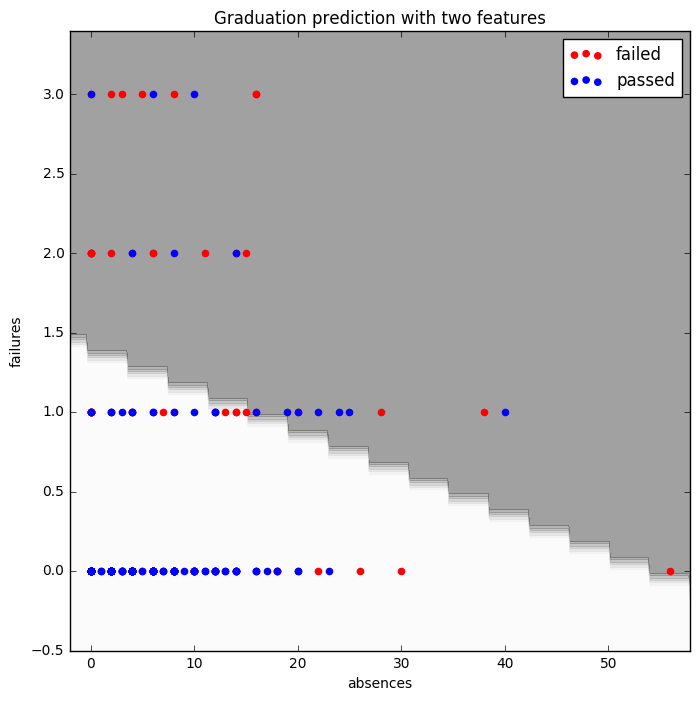

In [145]:
import matplotlib 
import matplotlib.pyplot as plt
import pylab as pl

#plots the decision boundary for given classifier and training features and labels
def plotDecisionBoundary(clf, X_train, y_train):    
    #create arrays for ease of use
    X_train_array = X_train_2feat.as_matrix()
    y_train_array = y_train.as_matrix()
    
    #init plot
    plt.figure(figsize=(8, 8))
    plt.title("Graduation prediction with two features")
    plt.xlabel(X_train.columns[0])
    plt.ylabel(X_train.columns[1])
    
    #Calculate min,max values for x,y in order to create a meshgrid    
    h = 0.1 # step size in the mesh
    x_min, x_max = X_train_array[:, 0].min() - 2, X_train_array[:, 0].max() + 2
    y_min, y_max = X_train_array[:, 1].min() - .5, X_train_array[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max()) 
    
    #make predictions and draw decision boundary
    probs = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    probs[probs=='yes'] = 1
    probs[probs=='no'] = 0
    probs = probs.reshape(xx.shape)
    plt.contourf(xx, yy, probs, alpha=0.4, cmap="Greys_r")
    
    #plot training data points
    absence_failed = [X_train_array[ii][0] for ii in range(0, len(X_train)) if y_train_array[ii]=='no']
    failures_failed = [X_train_array[ii][1] for ii in range(0, len(X_train)) if y_train_array[ii]=='no']
    absence_passed = [X_train_array[ii][0] for ii in range(0, len(X_train)) if y_train_array[ii]=='yes']
    failures_passed = [X_train_array[ii][1] for ii in range(0, len(X_train)) if y_train_array[ii]=='yes']
    plt.scatter(absence_failed, failures_failed, color = "r", label="failed")
    plt.scatter(absence_passed, failures_passed, color = "b", label="passed")
    plt.legend()
    plt.show()

#create new classifier and only fit on 2 features to be able to make it possible to draw decision boundary
clf = linear_model.LogisticRegression(random_state=ran_state)
X_train_2feat = X_train[['absences','failures']]
clf.fit(X_train_2feat, y_train)
plotDecisionBoundary(clf, X_train_2feat, y_train)

The model should predict weather a student might fail to graduate in order to intervene in time and help him/her. To create a model that is able to make predictions, data from previous students can be used. That data contains if the student has graduated but also other properties about them like age, the amount of studytime, their absences, etc. If we have those properties for new students, it can be feed to the model and it will predict if a student will graduate or not.

The model I have created is a Logistic Regression model. This is a very simple and fast method used for making predictions in cases where we have historical data in which we know the succes or failure of the events. 
It is simple because it assumes a lineair relation between the student properties. So not complex mathematical functions have to be used and this saved computing time compared to other models.
To get an impression how the model is created, I have drawn the picture above. In this (simple) example I have chosen to look at the following properties:
- absences: the number of school absences
- failures: number of failures in past classes

One might expect that a high number of past failures and a lot of school absences might have a negative influence on the graduation result. The model is plotting a point for every student in the dataset, a red one if the student did not graduate and a blue dot if the student passed. For students that did have 0 failures and less than 20 absences, everyone graduated. After plotting all points, the model is drawing a line to separate the space into 2 subspaces, one in which it is very likely the student will graduate (white) and one in which it is likely he/she will not graduate (dark gray). The model is not perfect, so in this simple example there are red points (failures) in the passed subspace (white). However, the model can handle more than the 2 features that I have chosen here and it can also find the most relevant ones, so it probably does a better job than the picture above.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [146]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit

# Create the parameters list you wish to tune
parameters = {'C': [0.01, 0.1, 1.0, 10, 100], 
              'class_weight': ['balanced', None],
              'fit_intercept': ['True', 'False']}

# Initialize the classifier
clf =  linear_model.LogisticRegression(random_state=ran_state)

# Create the Stratified Shuffle Split object, since labels are unbalanced
sss = StratifiedShuffleSplit(y_train, n_iter=10, test_size=0.24, random_state=ran_state)

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring = f1_scorer, cv=sss)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Print the parameters
print clf.get_params(), '\n'

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

{'warm_start': False, 'C': 0.1, 'n_jobs': 1, 'verbose': 0, 'intercept_scaling': 1, 'fit_intercept': 'True', 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': 21, 'dual': False, 'tol': 0.0001, 'solver': 'liblinear', 'class_weight': None} 

Made predictions in 0.0004 seconds.
Tuned model has a training F1 score of 0.8326.
Made predictions in 0.0002 seconds.
Tuned model has a testing F1 score of 0.7857.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

The final F1 score for training and testing are respectively 0.8326 and 0.7857. Both are a little bit (less than 1%) lower than the scores for the untuned model. This is somewhat unexpected because one would expect that the score would improve on tuning the parameters. However, the difference is not big and with a small dataset like this, these differences can occur.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.